In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Christy\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data = pd.read_csv("data/abcnews-date-text.csv",error_bad_lines=False,nrows=10000)
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
data.shape

(10000, 2)

In [5]:
#checking for duplicates in headlines
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(10)

,publish_date,headline_text
9253,20030404,5 australian sars cases being monitored
9458,20030405,5 australian sars cases being monitored
6402,20030322,all walks of life follow protest path
6192,20030321,all walks of life follow protest path
6197,20030321,asio briefs crean on terrorist risk
6409,20030322,asio briefs crean on terrorist risk
6609,20030323,australia celebrates world cup victory
6813,20030324,australia celebrates world cup victory
7295,20030326,british forces mark time on basra fringe
7063,20030325,british forces mark time on basra fringe


In [6]:
data = data.drop_duplicates('headline_text')

In [7]:
data.shape

(9967, 2)

### Model 01

Removing Stopwords

In [8]:
#we are importiting 2 functions from sklearn for NLP

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
len(text.ENGLISH_STOP_WORDS) #ENGLISH_STOP_WORDS is a frozenset where all the stopwords are listed

318

In [10]:
text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [11]:
#selecting the stopwords and adding puctuations to it
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
StopWords = text.ENGLISH_STOP_WORDS.union(punc)

In [12]:
StopWords

frozenset({'!',
           '"',
           '%',
           "'",
           '(',
           ')',
           ',',
           '.',
           ':',
           ';',
           '?',
           '[',
           ']',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
    

In [13]:
len(StopWords)

333

In [14]:
desc = data['headline_text'].values
desc #dataframe column is converted to an array.

array(['aba decides against community broadcasting licence',
       'act fire witnesses must be aware of defamation',
       'a g calls for infrastructure protection summit', ...,
       'vic nats leave door open on coalition',
       'waterfall survivors tell of train speeding before',
       'water wont be moved without studies gallop'], dtype=object)

In [15]:
vectorizer = TfidfVectorizer(stop_words = StopWords)
X=vectorizer.fit_transform(desc) #transorming desc to corresponding vector.

In [16]:
print("X is the TDIDF vector with %s rows and %s unique words(features)"%(X.shape[0],X.shape[1]))

X is the TDIDF vector with 9967 rows and 9820 unique words(features)


In [17]:
word_features = vectorizer.get_feature_names() #identiying the word from the vectors
word_features[500:510]

['anasta',
 'ancestral',
 'anchors',
 'ancient',
 'anderson',
 'andersson',
 'andy',
 'angeles',
 'anger',
 'angered']

In [18]:
X.shape  #we have 19938 observations and 13838 unique words present in the corpus 
# X will be the vector corresponding to data['headline_text']. This can be used for any ML tasks.

(9967, 9820)

### Model 2 

Case Conversion

Tokenization

Stemming

Removing Stopwords

In [19]:
#we are adding stemming  and tokenization to the preprocessing from the package NLTK
from nltk.stem.snowball import SnowballStemmer #SnowballStemmer is a stemming algorithm
from nltk.tokenize import RegexpTokenizer

In [20]:
stemmer = SnowballStemmer(language='english')
tokenizer = RegexpTokenizer(pattern=r'[a-zA-Z\']+')

def tokenize(text):
   
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())] 

#Step1 - Convert text to lower
#step2 - tokenize the text
#step3 - Stem the tokenized text

#lower case
#tokenize
#stemming

In [22]:
def tokenize_function(text):
    lower_words = text.lower()
    tokenized = tokenizer.tokenize(lower_words)
    stem_list  = list()
    for x in tokenized:
        stem_list.append(stemmer.stem(x))
    return stem_list

In [24]:
tokenize_function("INDIA launched  2 new satelites, and the launch is Success")

['india', 'launch', 'new', 'satelit', 'and', 'the', 'launch', 'is', 'success']

In [25]:
tokenize("INDIA launched  2 new satelites, and the launch is Success")

['india', 'launch', 'new', 'satelit', 'and', 'the', 'launch', 'is', 'success']

In [31]:
tokenizer1 = RegexpTokenizer(r'[a-zA-Z0-9\']+') #new RegEx for including numbers
tokenizer1.tokenize("INDIA launch  2 new satelites, and the launch is success")

['INDIA',
 'launch',
 '2',
 'new',
 'satelites',
 'and',
 'the',
 'launch',
 'is',
 'success']

In [32]:
vectorizer2 = TfidfVectorizer(stop_words = StopWords, tokenizer = tokenize) #we are giving StopWords and tokenize function as the arguments
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2)) 

C:\Users\Christy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6909


In [34]:
X2.shape

(9967, 6909)

In [35]:
print("X2 is the TDIDF vector with %s rows and %s unique words(features)"%(X2.shape[0],X2.shape[1]))

X2 is the TDIDF vector with 9967 rows and 6909 unique words(features)


In [36]:
words = vectorizer2.get_feature_names()

In [37]:
words

['aa',
 'aac',
 'ab',
 'aba',
 'abalon',
 'abandon',
 'abar',
 'abattoir',
 'abbott',
 'abc',
 'abdic',
 'abduct',
 'abid',
 'abigroup',
 'abil',
 'abl',
 'ablaz',
 'aboard',
 'abolit',
 'aborigin',
 'abort',
 'abov',
 'abreast',
 'abroad',
 'absenc',
 'absent',
 'abu',
 'abund',
 'abus',
 'abysm',
 'ac',
 'aca',
 'academ',
 'academi',
 'acapulco',
 'acb',
 'accc',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'account',
 'accredit',
 'accus',
 'ace',
 'aceh',
 'achiev',
 'acid',
 'acknowledg',
 'acoss',
 'acquir',
 'acquisit',
 'acquit',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actu',
 'acu',
 'ad',
 'adam',
 'add',
 'addict',
 'addit',
 'address',
 'adelaid',
 'adequ',
 'adf',
 'adjourn',
 'adjust',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adriatico',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advisori',
 'advoc',
 'aec',
 'aek',
 'aerial',
 'aerodynam',
 'aeronaut',
 'affair',
 'affect',
 'a

In [38]:
X2 #sparse matrix means most of the elements are 0

#Sparse matrix is a matrix which contains very few non-zero elements.

<9967x6909 sparse matrix of type '<class 'numpy.float64'>'
	with 49015 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.cluster import KMeans  #calculating wcss for identifying the value for K
wcss = []
for i in range(1,20):
    print("cluster",i)
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19


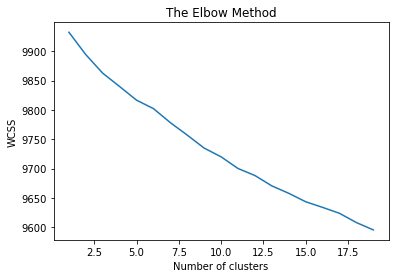

In [40]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X2)

C:\Users\Christy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=6, n_init=20, n_jobs=1)

In [42]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-16:-1] #checking for the most ffrequent words in each cluster
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : war, polic, plan, new, iraqi, win, protest, baghdad, anti, probe, say, ralli, forc, pm, arrest
1 : council, claim, say, warn, rain, world, fund, nsw, water, report, cup, death, urg, continu, set
2 : iraq, war, say, missil, troop, howard, post, destroy, blair, deni, pm, bush, british, bomb, turkey
3 : man, charg, face, murder, court, stab, polic, jail, death, miss, assault, arrest, hospit, search, u
4 : govt, vic, sa, nsw, urg, fund, wa, qld, local, claim, consid, reject, nt, fed, tas
5 : kill, soldier, crash, accid, attack, car, troop, palestinian, suspect, baghdad, iraq, gaza, wound, iraqi, isra


In [43]:
result = kmeans.predict(X2)

In [44]:
data['result']=result #adding a new column to dataframe

In [45]:
data.head(25)

,publish_date,headline_text,result
0,20030219,aba decides against community broadcasting lic...,1
1,20030219,act fire witnesses must be aware of defamation,1
2,20030219,a g calls for infrastructure protection summit,1
3,20030219,air nz staff in aust strike for pay rise,1
4,20030219,air nz strike to affect australian travellers,1
5,20030219,ambitious olsson wins triple jump,0
6,20030219,antic delighted with record breaking barca,1
7,20030219,aussie qualifier stosur wastes four memphis match,1
8,20030219,aust addresses un security council over iraq,2
9,20030219,australia is locked into war timetable opp,0


In [46]:
#END